# Online Food Order Prediction
Bu projede Online Yemek Siparişi veren müşterilerin yeniden sipariş verip vermeyeceğini tahmin eden modeli geliştiriliyor.<br>
Bu modelde kullanılan veriler <a href="https://thecleverprogrammer.com/2022/06/07/online-food-order-prediction-with-machine-learning/"
target="_blank">buradan</a> indirilmiştir.<br><br>

<img src="https://cdn.webtekno.com/media/cache/content_detail_v2/article/92887/yemek-siparisi-android-iphone-ios-1590433195.jpg" wi4th="300px">


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("onlinefoods.txt")

### Keşfedici Veri Analizi (EDA)

In [59]:
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
91,26,1,1,2,25000,4,1,12.9698,77.7500,560066,0,1,No
387,23,1,1,1,0,3,5,12.8988,77.5764,560078,1,1,Yes
8,23,0,1,1,0,3,2,12.9766,77.5993,560001,1,1,Yes
135,27,0,2,3,50000,3,2,12.9698,77.7500,560066,0,1,No
273,24,0,2,3,25000,3,2,12.9561,77.5921,560027,1,1,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int32  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    int32  
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int32(2), int64(7), 

### Kategorik alanları sayıya dönüştürme
Yukarıda hiç bir alanda boş veri olmadığı görülmektedir. Bu nedenle sadece alanları sayıya çevirmek yeterli olacaktır.

In [20]:
df["Gender"].value_counts()

Gender
Male      222
Female    166
Name: count, dtype: int64

In [21]:
df["Gender"]=np.where(df["Gender"]=="Male", 1,0)

In [22]:
df["Marital Status"].value_counts()

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [23]:
d={"Prefer not to say":0, "Single":1, "Married":2}
df["Marital Status"]=df["Marital Status"].map(d)

In [24]:
df["Occupation"].value_counts()

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

In [25]:
d={"House wife":0, "Student":1, "Self Employeed":2, "Employee":3}
df["Occupation"]=df["Occupation"].map(d)

In [29]:
df["Monthly Income"].value_counts()

Monthly Income
0        187
50000     69
75000     62
25000     45
10000     25
Name: count, dtype: int64

In [27]:
d={"No Income":0, "25001 to 50000":50000, "More than 50000":75000, "10001 to 25000":25000, "Below Rs.10000":10000}
df["Monthly Income"]=df["Monthly Income"].map(d)

In [30]:
df["Educational Qualifications"].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [31]:
d={"Uneducated":0,  "School":1, "Graduate":2, "Post Graduate":3, "Ph.D":4}
df["Educational Qualifications"]=df["Educational Qualifications"].map(d)

In [34]:
df["Feedback"].value_counts(dropna=False)

Feedback
1    317
0     71
Name: count, dtype: int64

In [33]:
df["Feedback"]=np.where(df["Feedback"]=="Positive", 1,0)

In [39]:
df["Output"].value_counts(dropna=False)

Output
1    301
0     87
Name: count, dtype: int64

In [38]:
df["Output"]=np.where(df["Output"]=="Yes", 1,0)

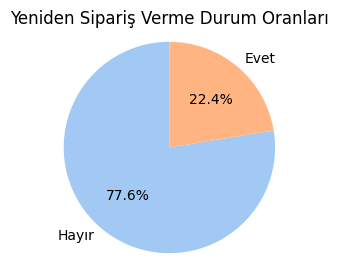

In [47]:
plt.figure(figsize=(3,3))
sns.set_palette('pastel')
plt.pie(df["Output"].value_counts(), labels=["Hayır", "Evet"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yeniden Sipariş Verme Durum Oranları')
plt.show()

Sınıf dağılımında dengesizlik var. Modellemeden önce dengelemek gerekir.

## Modelleme

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int32  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    int32  
 11  Feedback                    388 non-null    int32  
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int32(3), int64(7), 

In [36]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [41]:
x=df.drop(["latitude", "longitude", "Unnamed: 12", "Output"], axis=1)
y=df[["Output"]]

In [50]:
# Verilerdeki dengesizliği giderelim
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         602 non-null    int64
 1   Gender                      602 non-null    int32
 2   Marital Status              602 non-null    int64
 3   Occupation                  602 non-null    int64
 4   Monthly Income              602 non-null    int64
 5   Educational Qualifications  602 non-null    int64
 6   Family size                 602 non-null    int64
 7   Pin code                    602 non-null    int64
 8   Feedback                    602 non-null    int32
dtypes: int32(2), int64(7)
memory usage: 37.8 KB


In [57]:
x.describe()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Feedback
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,25.014950,0.486711,1.259136,1.843854,28073.089701,2.408638,3.209302,560041.244186,0.569767
std,2.935486,0.500239,0.528040,0.902319,28467.945720,0.646860,1.337808,31.073289,0.495520
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,560001.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,560013.000000,0.000000
50%,25.000000,0.000000,1.000000,2.000000,25000.000000,2.000000,3.000000,560035.000000,1.000000
75%,27.000000,1.000000,2.000000,3.000000,50000.000000,3.000000,4.000000,560068.000000,1.000000
max,33.000000,1.000000,2.000000,3.000000,75000.000000,4.000000,6.000000,560109.000000,1.000000


In [52]:
x.shape, y.shape

((602, 9), (602, 1))

In [53]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[62 31]
 [18 70]]
BernoulliNB()  modeli eğitiliyor!..
[[78 15]
 [ 7 81]]
LogisticRegression()  modeli eğitiliyor!..
[[75 18]
 [ 7 81]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[77 16]
 [10 78]]
RandomForestClassifier()  modeli eğitiliyor!..
[[82 11]
 [11 77]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[80 13]
 [ 8 80]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[71 22]
 [21 67]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[80 13]
 [ 8 80]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        93
           1       0.86      0.91      0.88        88

    accuracy                           0.88       181
   macro avg       0.88      0.88      0.88       181
weighted avg       0.89      0.88      0.88       181

Diğer Modeller:


,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.883978,0.883978,0.883978,0.883978
BernoulliNB,0.878453,0.878453,0.878453,0.878453
RandomForestClassifier,0.878453,0.878453,0.878453,0.878453
LogisticRegression,0.861878,0.861878,0.861878,0.861878
DecisionTreeClassifier,0.856354,0.856354,0.856354,0.856354
KNeighborsClassifier,0.762431,0.762431,0.762431,0.762431
GaussianNB,0.729282,0.729282,0.729282,0.729282


# Sonuç
Müşteri bilgileri kullanılarak bir sonraki siparişi verip vermeyeceğini tahmin eden model geliştirildi. Sipariş veren ve vermeyen müşteri sayılarında dengesizlik olduğu için Over Sampling metodu ile denge sağlandı. Denenen sınıflandırma modelleri başarısı %73 ila %88 arasında değişmektedir. İçerisinde en yüksek başarı <b>GradientBoostingClassifier</b> modeli ile %88.3 oranında sağlandı.<br><br>
En başarılı model kaydedip Streamlit uygulamasında kullanalım.

In [54]:
gbc=GradientBoostingClassifier()

In [55]:
model=gbc.fit(x,y)

In [56]:
import pickle
pickle.dump(model, open('order_model.pkl', 'wb'))

Bu projede oluşturulan uygulamaya <a href="https://huggingface.co/spaces/abdullatifkaban/Order_Classifier" target=_blank>
<u>Hugging Face</u></a> üzerinden ulaşılabilir.